### Question 3 Log Cooling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def schwefel_2d(x,y):
    return 418.9829 * 2 - (x*np.sin(np.sqrt(np.abs(x))) + y * np.sin(np.sqrt(np.abs(y))) )

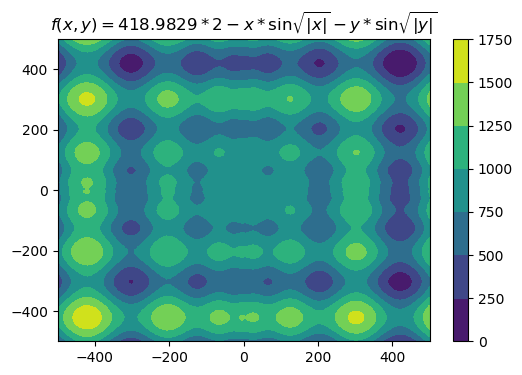

In [3]:
N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
X, Y = np.meshgrid(x, y)
Z = schwefel_2d(X,Y)

plt.figure(num=None,dpi=100)
plt.contourf(X,Y,Z)
plt.title('$f(x,y) = 418.9829 * 2 -x*\sin \sqrt{|x|} - y *\sin \sqrt{|y|}$')
plt.colorbar()
plt.show()

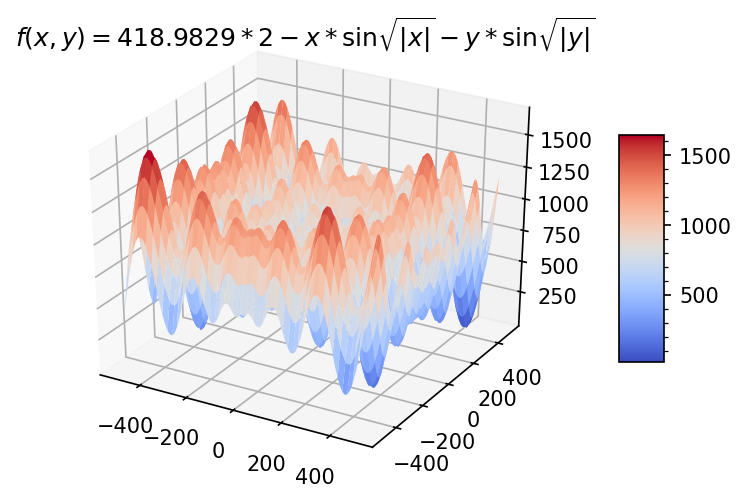

In [4]:
cplot = plt.figure(num=None,dpi=150)
ax = cplot.add_subplot(111,projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm)
cbar = cplot.colorbar(surf, shrink=0.5, aspect=5)
cbar.minorticks_on()
plt.title('$f(x,y) = 418.9829 * 2 -x*\sin \sqrt{|x|} - y *\sin \sqrt{|y|}$')
plt.show()

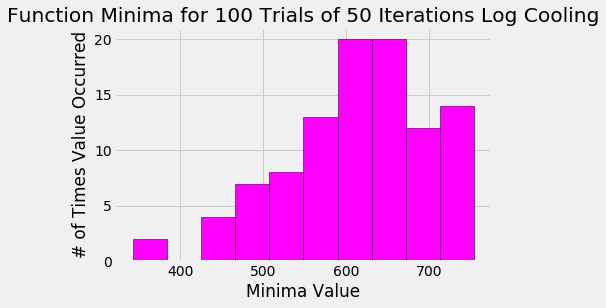

Minimum X,Y pair from 100 trials for 50 Iterations: (210.0199055089765, -298.56540610088445)
Function minima value for X,Y pair:  342.468431428446


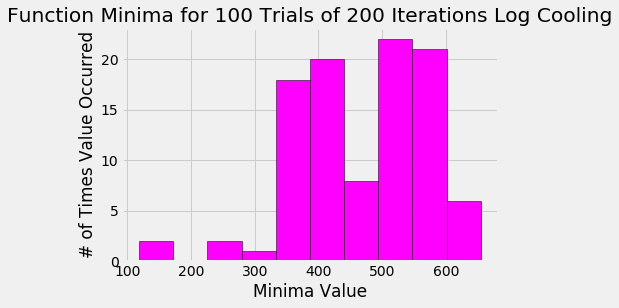

Minimum X,Y pair from 100 trials for 200 Iterations: (-301.8231250418515, 422.04807781673105)
Function minima value for X,Y pair:  118.64776278272791


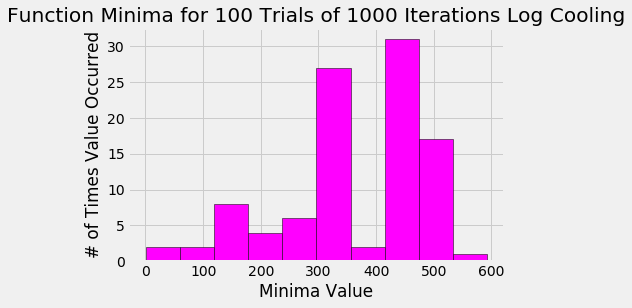

Minimum X,Y pair from 100 trials for 1000 Iterations: (421.7041203154593, 420.78889906942567)
Function minima value for X,Y pair:  0.07236091219147056


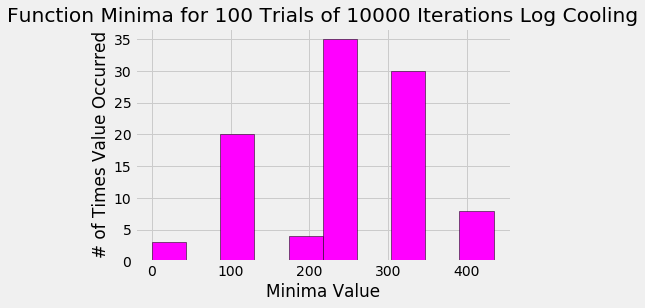

Minimum X,Y pair from 100 trials for 10000 Iterations: (420.9790620399202, 421.0199101834157)
Function minima value for X,Y pair:  0.00036920452168942575


In [32]:
X0 = 0
Y0 = 0
T0 = 500
N = [50, 200, 1000,10000]
trials = 100

for n in range(0,len(N)):
    min_outputs = np.zeros(trials)
    min_x = np.zeros(trials)
    min_y = np.zeros(trials)
    for trial in range(0,trials):

        X = np.zeros(N[n])
        Y = np.zeros(N[n])
        xy_output = np.zeros(N[n])
        X[0] = 0
        Y[0] = 0
        T = T0
        xy_output[0] = schwefel_2d(X[0], Y[0])
        for i in range(1,N[n]):
            while 1:
                X_temp = X[i-1] + np.random.normal(0,25)
                Y_temp = Y[i-1] + np.random.normal(0,25)
                if ((np.abs(X_temp) < 500) and (np.abs(Y_temp) < 500) ):
                    break
            alpha = np.exp((schwefel_2d(X[i-1], Y[i-1]) - schwefel_2d(X_temp, Y_temp))/T)
            
            if(schwefel_2d(X_temp, Y_temp) <= schwefel_2d(X[i-1], Y[i-1])):
                X[i] = X_temp
                Y[i] = Y_temp
                xy_output[i] = schwefel_2d(X_temp, Y_temp)
            elif (np.random.uniform() < alpha):
                X[i] = X_temp
                Y[i] = Y_temp
                xy_output[i] = schwefel_2d(X_temp, Y_temp)
            else:
                X[i] = X[i-1]
                Y[i] = Y[i-1]
                xy_output[i] = schwefel_2d( X[i-1], Y[i-1])
            T = T0/np.log(i+1)
        min_outputs[trial] = min(xy_output)
        
        min_x[trial] = X[np.argmin(xy_output)]
        min_y[trial] = Y[np.argmin(xy_output)]
    #print(min_outputs)
    plt.hist(min_outputs, bins = 10, edgecolor = 'black', facecolor = 'magenta' )
#plt.xticks(np.arange(70,120))
    plt.xlabel("Minima Value")
    plt.ylabel("# of Times Value Occurred")
    plt.title("Function Minima for 100 Trials of {number} Iterations Log Cooling".format(number=N[n]))
    plt.style.use('fivethirtyeight')
    plt.show()
    x_min_trials = min_x[np.argmin(min_outputs)]
    y_min_trials = min_y[np.argmin(min_outputs)]
    print("Minimum X,Y pair from 100 trials for {number} Iterations: ({X}, {Y})".format(X = x_min_trials, 
                Y = y_min_trials, number=N[n]))
    print("Function minima value for X,Y pair: ", min(min_outputs))


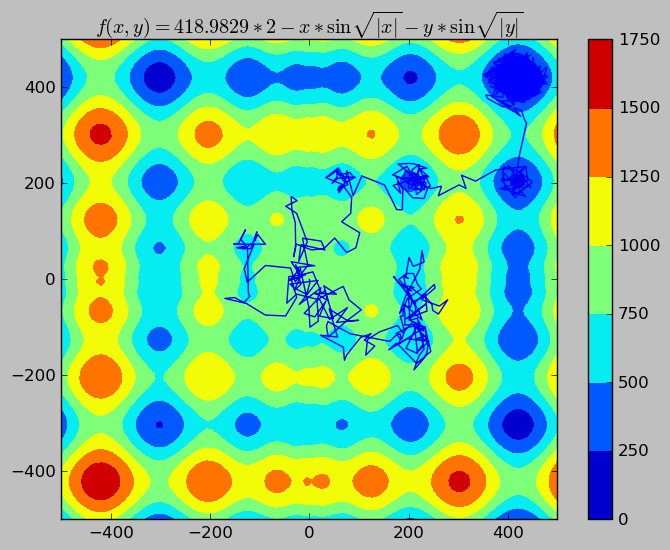

In [62]:

X = np.zeros(10000)
Y = np.zeros(10000)
xy_output = np.zeros(10000)
X[0] = 0
Y[0] = 0
T = T0
xy_output[0] = schwefel_2d(X[0], Y[0])
for i in range(1,10000):
    while 1:
        X_temp = X[i-1] + np.random.normal(0,25)
        Y_temp = Y[i-1] + np.random.normal(0,25)
        if ((np.abs(X_temp) < 500) and (np.abs(Y_temp) < 500) ):
            break
    alpha = np.exp((schwefel_2d(X[i-1], Y[i-1]) - schwefel_2d(X_temp, Y_temp))/T)

    if(schwefel_2d(X_temp, Y_temp) <= schwefel_2d(X[i-1], Y[i-1])):
        X[i] = X_temp
        Y[i] = Y_temp
        xy_output[i] = schwefel_2d(X_temp, Y_temp)
    elif (np.random.uniform() < alpha):
        X[i] = X_temp
        Y[i] = Y_temp
        xy_output[i] = schwefel_2d(X_temp, Y_temp)
    else:
        X[i] = X[i-1]
        Y[i] = Y[i-1]
        xy_output[i] = schwefel_2d( X[i-1], Y[i-1])
    T = T0/np.log(i+1)

N_r = 500
x = np.linspace(-N_r,N_r,100)
y = np.linspace(-N_r,N_r,100)
x, y = np.meshgrid(x, y)
Z = schwefel_2d(x,y)

plt.style.use('classic')
plt.figure(num=None,dpi=100)
plt.contourf(x,y,Z)
plt.title('$f(x,y) = 418.9829 * 2 -x*\sin \sqrt{|x|} - y *\sin \sqrt{|y|}$')
plt.plot(X,Y)
plt.colorbar()
plt.show()

#### Question 3 (Log Cooling) Analysis


- The first 4 Histograms are for 100 trials at the 4 different iteration values: 50, 200, 100, and 10000 using logarithmic temperature cooling.
- As evident from the histograms, as the number of iterations increase, the number of trials with which the global minima is approached increases, and the best estimate of the 100 trials at that iteration count gets better and better. 
- The countour map above is overlayed with the path of a trial that approaches the global minima. As one can tell, it jumps from local minima to local minima, eventually settling closer and closer to the global minima.